# Computer Vision



Select an RGB image of your choosing from somewhere on the internet. 

Import the image and display it.

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from skimage import color
from skimage.exposure import rescale_intensity
import scipy.ndimage as nd

In [2]:
!wget http://www.rayheberer.ai/img/udacity/dog-recognizer/duke.jpg

--2018-06-08 16:24:55--  http://www.rayheberer.ai/img/udacity/dog-recognizer/duke.jpg
Resolving www.rayheberer.ai (www.rayheberer.ai)... 54.93.227.245
Connecting to www.rayheberer.ai (www.rayheberer.ai)|54.93.227.245|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92756 (91K) [image/jpeg]
Saving to: ‘duke.jpg.3’

duke.jpg.3          100%[===================>]  90.58K   271KB/s    in 0.3s    

2018-06-08 16:24:56 (271 KB/s) - ‘duke.jpg.3’ saved [92756/92756]



In [0]:
img = cv2.imread('duke.jpg')
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

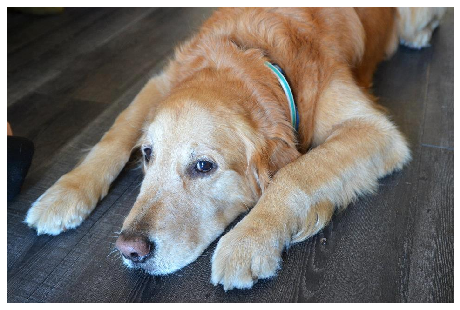

In [4]:
plt.imshow(img_color)
plt.xticks([])
plt.yticks([]);

Generate a grayscale version of the image and display it again.

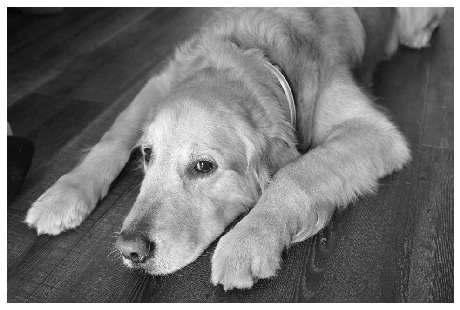

In [5]:
img_gray = cv2.imread('duke.jpg', 0)
plt.imshow(img_gray, cmap='gray')
plt.xticks([]), plt.yticks([]);

Use Canny Edge Detection to find the edges in the image. Display the Canny Edge Detection image. 

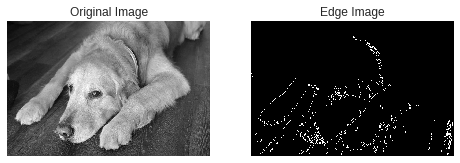

In [6]:
edges = cv2.Canny(img_gray, 100, 300)

plt.subplot(121), plt.imshow(img_gray, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges/255, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([]);

Compute the convolution of the image with the following Difference of Gaussian (DoG) filter: 

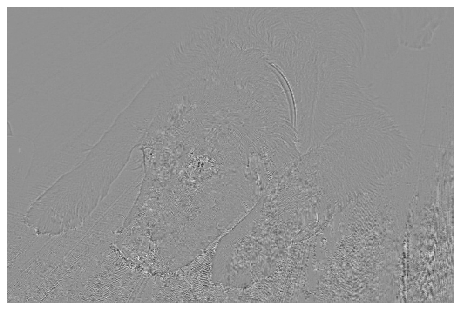

In [7]:
dog_filter = np.array([[1,1,1,1,1],[1,-3,-3,-3,1],[1,-3,8,-3,1],[1,-3,-3,-3,1],[1,1,1,1,1]])

dog_filtered_dog = nd.convolve(img_gray/255, dog_filter)
plt.imshow(dog_filtered_dog, cmap='gray'), plt.xticks([]), plt.yticks([]);

# Deep Convolutional Neural Networks



Use the softmax function to transform the following vector to probability values:

$\begin{bmatrix}
4&5&9&2
\end{bmatrix}$

In [8]:
def softmax(X):
    if type(X)!=np.ndarray:
        X = np.array(X)
    if len(X.shape)==1:
        X = X.reshape(1, -1)
    
        
    top = np.exp(X)
    bottom = np.sum(top, axis=1).reshape(-1, 1)
    
    return top/bottom

print('softmax([4, 5, 9, 2]):', softmax([4, 5, 9, 2]))

softmax([4, 5, 9, 2]): [[6.56742084e-03 1.78521007e-02 9.74691675e-01 8.88803760e-04]]


Use the Keras library to classify the images of the MNIST-fashion dataset using a simple convolutional neural network. This dataset is just like MNIST but has grayscale images of different articles of clothing. It also has 10 classes, so any code that works on the MNIST dataset should work on this dataset without modification. I'll help you with the image preparation, and will limit the number of classes to 2 for fast training times. We will focus only on classifying pullovers and shirts.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# What are the dimensions of a single image?
print(x_train[0].shape)

# input image dimensions
img_rows, img_cols = 28,28

if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")
    
print(K.image_data_format())

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#Only look at 2s and 7s
num_classes = 2

# Create boolean arrays for train and test
train_picks = np.logical_or(y_train==2,y_train==6)
test_picks = np.logical_or(y_test==2,y_test==6)

# Filter train and test based on boolean arrays
x_train = x_train[train_picks]
x_test = x_test[test_picks]
y_train = np.array(y_train[train_picks]==2,dtype=int)
y_test = np.array(y_test[test_picks]==2,dtype=int)

# Scale pixel values to be floats between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

Using TensorFlow backend.


(28, 28)
channels_first
x_train shape: (12000, 1, 28, 28)
12000 train samples
2000 test samples


I will implement the old classic, [LeNet-5](http://yann.lecun.com/exdb/lenet/) architecture, using ReLU activations, softmax output, categorical crossentropy loss, and Adam optimizer.

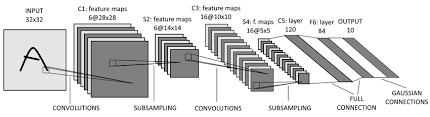

In [10]:
lenet = Sequential()

lenet.add(Conv2D(6, (5,5), activation='relu', padding='SAME', input_shape=(1, 28, 28)))
lenet.add(MaxPooling2D((2,2), 2))

lenet.add(Conv2D(16, (5,5), activation='relu'))
lenet.add(MaxPooling2D((2,2), 2))
lenet.add(Flatten())

lenet.add(Dense(120, activation='relu'))
lenet.add(Dense(84, activation='relu'))
lenet.add(Dense(2, activation='softmax'))

lenet.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

lenet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 6, 28, 28)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 14, 14)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 10, 10)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 5, 5)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
__________

Plot your validation and test accuracies by epoch.

I will use `x_test` and `y_test` as a held-out test set to obtain a final unbiased estimate of my best model's performance. The best model will be that which obtains the highest validation accuracy. For validation data, I will use 10% of the training data (1,200 samples). The reasons for having a held-out test set in addition to a validation set for model selections I have outlined in my most recent article: [Black Magic and Hyperparameter Tuning](https://medium.com/@rayheberer/black-magic-and-hyperparameter-tuning-ef875eb31712).

In [0]:
from keras.callbacks import ModelCheckpoint

In [0]:
np.random.seed(41)

In [13]:
checkpointer = ModelCheckpoint(filepath='weights.best.lenet.hdf5', 
                               verbose=1, save_best_only=True)

lenet_training = lenet.fit(x_train, y_train, 
                           epochs=10, batch_size=10, 
                           validation_split=0.1,
                           callbacks=[checkpointer])

Train on 10800 samples, validate on 1200 samples
Epoch 1/10
10800/10800 [==============================] - 10s 957us/step - loss: 0.3719 - acc: 0.8336 - val_loss: 0.2493 - val_acc: 0.8967

Epoch 00001: val_loss improved from inf to 0.24935, saving model to weights.best.lenet.hdf5
Epoch 2/10
10800/10800 [==============================] - 9s 873us/step - loss: 0.2391 - acc: 0.9029 - val_loss: 0.2280 - val_acc: 0.8992

Epoch 00002: val_loss improved from 0.24935 to 0.22800, saving model to weights.best.lenet.hdf5
Epoch 3/10
 1190/10800 [==>...........................] - ETA: 8s - loss: 0.1924 - acc: 0.9202

10800/10800 [==============================] - 9s 876us/step - loss: 0.2078 - acc: 0.9136 - val_loss: 0.2248 - val_acc: 0.9050

Epoch 00003: val_loss improved from 0.22800 to 0.22480, saving model to weights.best.lenet.hdf5
Epoch 4/10
10800/10800 [==============================] - 9s 867us/step - loss: 0.1900 - acc: 0.9238 - val_loss: 0.2120 - val_acc: 0.9025

Epoch 00004: val_loss improved from 0.22480 to 0.21205, saving model to weights.best.lenet.hdf5
Epoch 5/10
 3780/10800 [=========>....................] - ETA: 5s - loss: 0.1609 - acc: 0.9307

10800/10800 [==============================] - 9s 879us/step - loss: 0.1739 - acc: 0.9276 - val_loss: 0.2161 - val_acc: 0.9083

Epoch 00005: val_loss did not improve from 0.21205
Epoch 6/10
10800/10800 [==============================] - 9s 867us/step - loss: 0.1584 - acc: 0.9367 - val_loss: 0.2137 - val_acc: 0.9200

Epoch 00006: val_loss did not improve from 0.21205
Epoch 7/10
 6310/10800 [================>.............] - ETA: 3s - loss: 0.1496 - acc: 0.9423

10800/10800 [==============================] - 9s 863us/step - loss: 0.1452 - acc: 0.9445 - val_loss: 0.2678 - val_acc: 0.9100

Epoch 00007: val_loss did not improve from 0.21205
Epoch 8/10
10800/10800 [==============================] - 9s 863us/step - loss: 0.1358 - acc: 0.9463 - val_loss: 0.2195 - val_acc: 0.9142

Epoch 00008: val_loss did not improve from 0.21205
Epoch 9/10
 6660/10800 [=================>............] - ETA: 3s - loss: 0.1203 - acc: 0.9527

10800/10800 [==============================] - 9s 868us/step - loss: 0.1249 - acc: 0.9522 - val_loss: 0.2276 - val_acc: 0.9017

Epoch 00009: val_loss did not improve from 0.21205
Epoch 10/10
10800/10800 [==============================] - 9s 875us/step - loss: 0.1140 - acc: 0.9556 - val_loss: 0.2434 - val_acc: 0.9108

Epoch 00010: val_loss did not improve from 0.21205


In [0]:
def train_val_metrics(model_training):
    metrics = model_training.history
    train_loss = metrics['loss']
    train_acc = metrics['acc']
    val_loss = metrics['val_loss']
    val_acc = metrics['val_acc']
    epochs = range(1, len(train_loss)+1)
    
    ax = plt.subplot(211)
    train, = ax.plot(epochs, train_loss)
    val, = ax.plot(epochs, val_loss)
    ax.legend([train, val], ['training', 'validation'])
    ax.set(xlabel='epochs', ylabel='categorical cross-entropy loss')

    ax2 = plt.subplot(212)
    train2, = ax2.plot(epochs, train_acc)
    val2, = ax2.plot(epochs, val_acc)
    ax2.legend([train2, val2], ['training', 'validation'])
    ax2.set(xlabel='epochs', ylabel='accuracy')

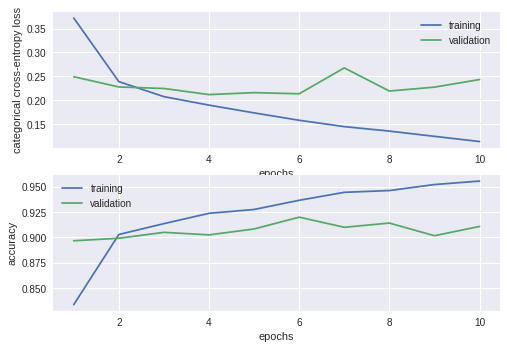

In [15]:
train_val_metrics(lenet_training)

The best model after 10 epochs had a training accuracy of 92.38% and a validation accuracy of 90.25%. More recent, advanced networks training for more epochs could likely improve on this, but I chose LeNet because it is simple enough to not lose sight of the educational purposes of this exercise within implementation details.

In [16]:
lenet.load_weights('weights.best.lenet.hdf5')

predictions = [np.argmax(lenet.predict(np.expand_dims(x, axis=0))) for x in x_test]

test_accuracy = 100*np.sum(np.array(predictions)==np.argmax(y_test, axis=1))/len(predictions)
print('Test accuracy: {:.4f}%'.format(test_accuracy))

Test accuracy: 89.5000%


### If you have time left over, go start a blog post about one specific Deep Learning-related topic that you would like to understand better. Possible Ideas:

Input Dimensions - RGB vs Grayscale, Channels First, vs Channels Last.

Convolutional Layers - How are they calculated? How to use padding to preserve layer dimensions?

Why does Relu Activation outperform other types of activation for CNNs?

Max Pooling vs Average Pooling? Why is max pooling better? Why pass on the highest value?

How does backpropagation work in CNNs?

Hyperparameter Tuning CNNs

Picking optimal Batch Size

Picking the optimal Number of Filters / kernel size

Brief History of Computer Vision

Summary of Most impactful CNN Architectures i.e. LeNet, AlexNet, ResNet, GoogleNet, etc. 

Matrices for Image Filtering

Edge Detection Methods

Keras vs Tensorflow

### There are so many things that you could write about!!




